In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset 

In [3]:
df = pd.read_csv("datasets/advertising.csv")
df.shape

(200, 4)

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


<Figure size 1200x400 with 0 Axes>

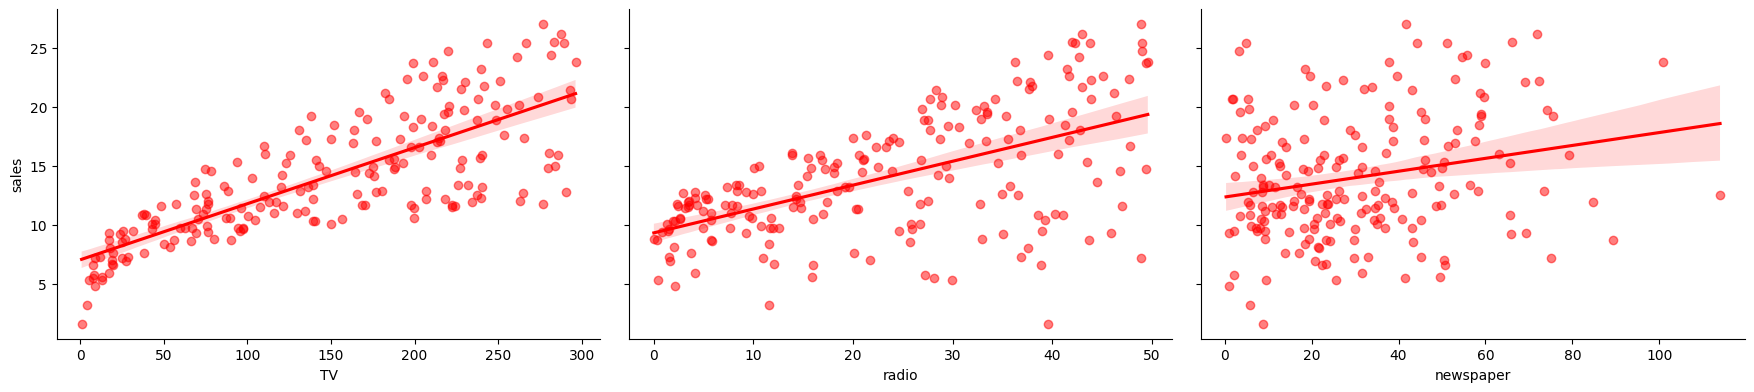

In [8]:
# Adjusting the figure size correctly for the seaborn pairplot
plt.figure(figsize=(12, 4))
g = sns.PairGrid(df, x_vars=["TV", "radio", "newspaper"], y_vars="sales", height=4, aspect=1.5)
g = g.map(sns.regplot, color='red', scatter_kws={'alpha': 0.5})
plt.show()

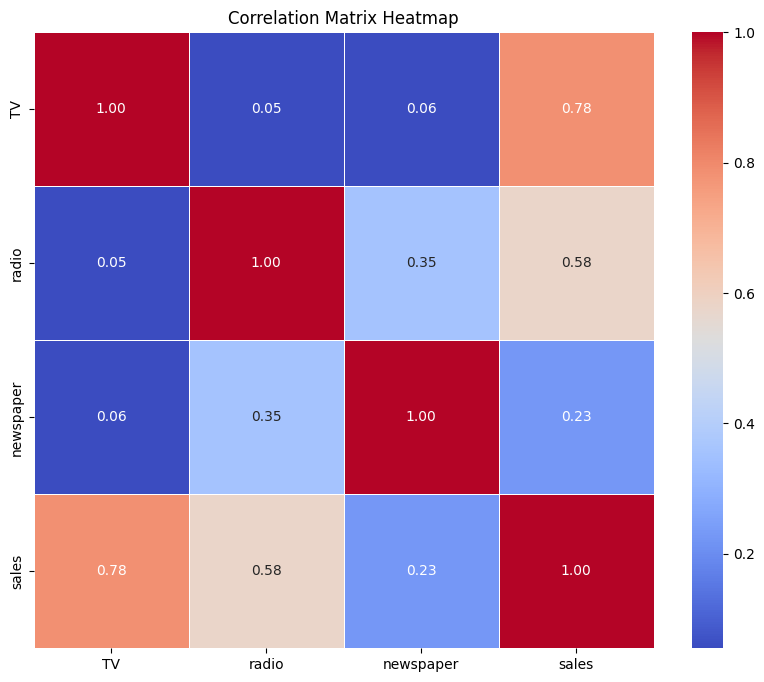

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

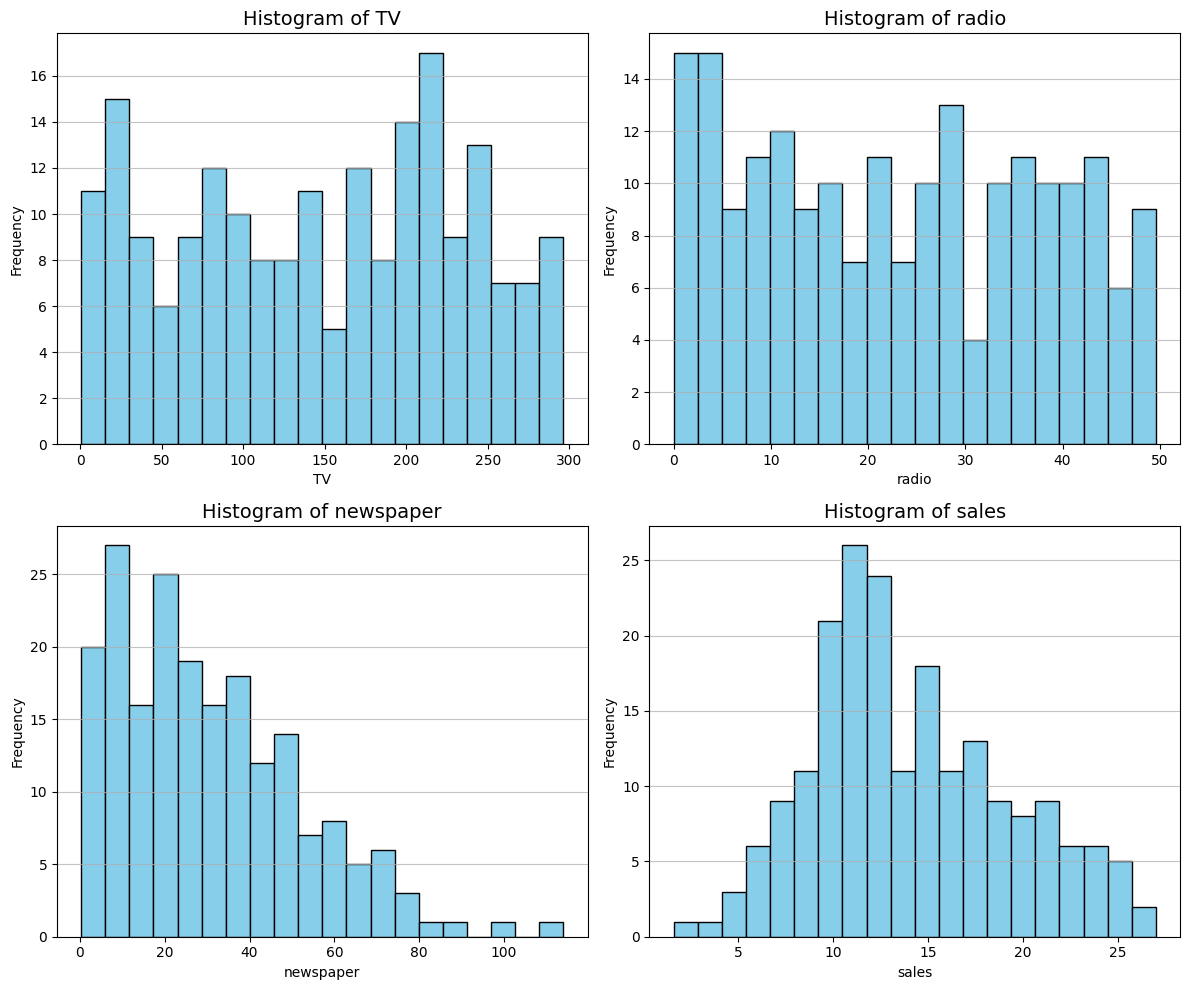

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax = ax.flatten()
for i, col in enumerate(df.columns):
    ax[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    ax[i].set_title(f'Histogram of {col}', fontsize=14)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')
    ax[i].grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# Practice Time Part 1 

## Linear Model training  

In [11]:
X = df.drop('sales', axis=1)
y = df[["sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

In [12]:
column_names=X_train.columns
X_test_copy=X_test.copy()
y_test_copy=y_test.copy()

### English 
- X contains the input features, and y contains the target variable to predict (in this case, 'sales').\
- train_test_split divides your data into two parts: training data (used to train your model) and testing 
- data (used to evaluate the model's performance).\
- test_size=0.20 means 20% of the data is reserved for testing, and 80% for training.\
- random_state=99 ensures reproducibility, so you get the same split every time you run the code.

### German
- X enthält die Eingabemerkmale, und y enthält die Zielvariable, die vorhergesagt werden soll (in diesem Fall 'Verkäufe').
- train_test_split teilt Ihre Daten in zwei Teile: Trainingsdaten (zum Trainieren Ihres Modells verwendet) und Testdaten (zur Bewertung der Leistung des Modells verwendet).
- test_size=0.20 bedeutet, dass 20% der Daten für Tests reserviert sind und 80% für das Training.
- random_state=99 stellt die Reproduzierbarkeit sicher, sodass Sie jedes Mal, wenn Sie den Code ausführen, dieselbe Aufteilung erhalten.

In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### English 
- Do not scale all of dataset and  then split train and test . First split then do scaling
### German 
- Skalieren Sie nicht den gesamten Datensatz und teilen Sie ihn dann in Trainings- und Testdaten. Teilen Sie zuerst und skalieren Sie dann.





In [14]:
y.shape

(200, 1)

In [15]:
X_train.shape

(160, 3)

In [16]:
X_test.shape

(40, 3)

In [17]:
X_test.head()

,TV,radio,newspaper
135,48.3,47.0,8.5
127,80.2,0.0,9.2
191,75.5,10.8,6.0
66,31.5,24.6,2.2
119,19.4,16.0,22.3


In [18]:
y_test.head()

,sales
135,11.6
127,8.8
191,9.9
66,9.5
119,6.6


In [19]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

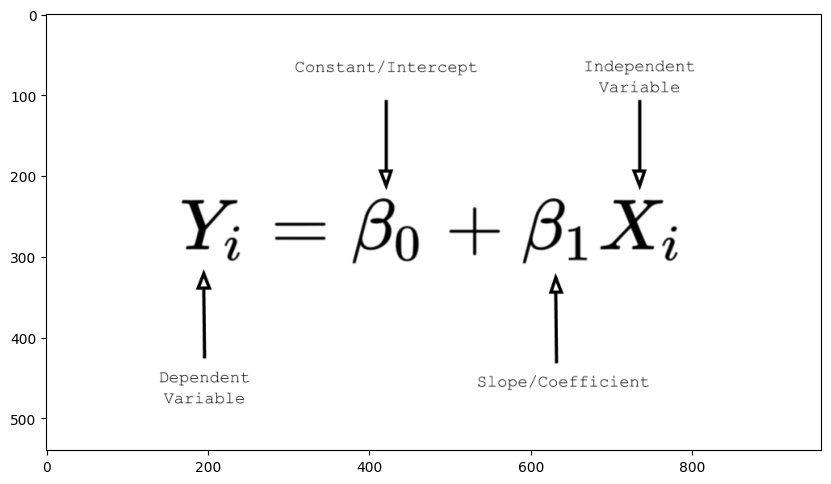

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread('Documents/1_GSAcN9G7stUJQbuOhu0HEg.png')
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [21]:
# Predict the values for the X_test data
y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)

In [22]:
X_test['prediction']=y_pred 
X_test['actual_values']=y_test

In [23]:
X_test.head()

,TV,radio,newspaper,prediction,actual_values
135,48.3,47.0,8.5,13.954466,11.6
127,80.2,0.0,9.2,6.560968,8.8
191,75.5,10.8,6.0,8.377303,9.9
66,31.5,24.6,2.2,8.969426,9.5
119,19.4,16.0,22.3,6.815364,6.6


In [24]:
model.intercept_

array([14.260625])

In [25]:
model.coef_

array([[3.93557844, 2.80697863, 0.01693147]])

In [26]:
14.260625+(19.4*-1.18970327+ 1.56509423* 16.0+ 22.3* -1.0143799)

-6.3987825280000035

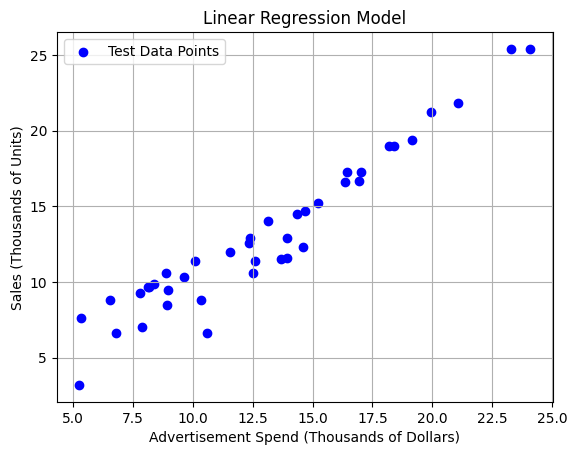

In [27]:
# Plot the data points
plt.scatter(y_pred, y_test, color='blue', label='Test Data Points')
plt.title('Linear Regression Model')
plt.xlabel('Advertisement Spend (Thousands of Dollars)')
plt.ylabel('Sales (Thousands of Units)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

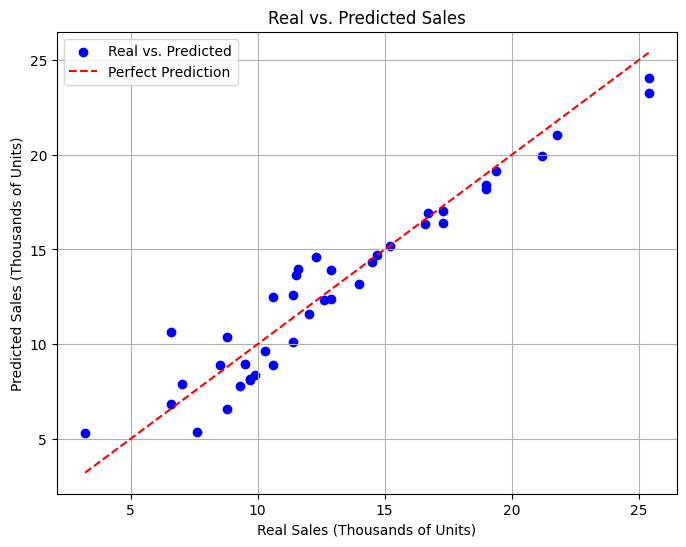

In [28]:
import matplotlib.pyplot as plt
real_values = X_test['actual_values'].tolist()
predicted_values = X_test['prediction'].tolist()
plt.figure(figsize=(8, 6))
plt.scatter(real_values, predicted_values, color='blue', label='Real vs. Predicted')
plt.plot([min(real_values), max(real_values)], [min(real_values), max(real_values)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Real vs. Predicted Sales')
plt.xlabel('Real Sales (Thousands of Units)')
plt.ylabel('Predicted Sales (Thousands of Units)')
plt.legend()
plt.grid(True)
plt.show()


# Practice Time Part 2

## Model Evalaution 

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Model evaultion in train datset 

In [30]:
actual_values=y_train
predicted_values=y_pred_train
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_values, predicted_values)
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
r_squared = r2_score(actual_values, predicted_values)

In [31]:
print("R-squared:", r_squared)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R-squared: 0.8906288862925659
Mean Absolute Percentage Error (MAPE): 14.437853593753205 %
Mean Squared Error: 2.971081299667491
Root Mean Squared Error: 1.7236824822650751
Mean Absolute Error: 1.287082714282573


### Model  evaultion in  test  datset 

In [32]:
actual_values=y_test
predicted_values=y_pred
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_values, predicted_values)
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
r_squared = r2_score(actual_values, predicted_values)

In [33]:
print("R-squared:", r_squared)
print("Mean Absolute Percentage Error (MAPE):", mape, "%")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R-squared: 0.9200846680148507
Mean Absolute Percentage Error (MAPE): 11.861366239857132 %
Mean Squared Error: 2.0485576116405175
Root Mean Squared Error: 1.4312783138301641
Mean Absolute Error: 1.1458629205525601


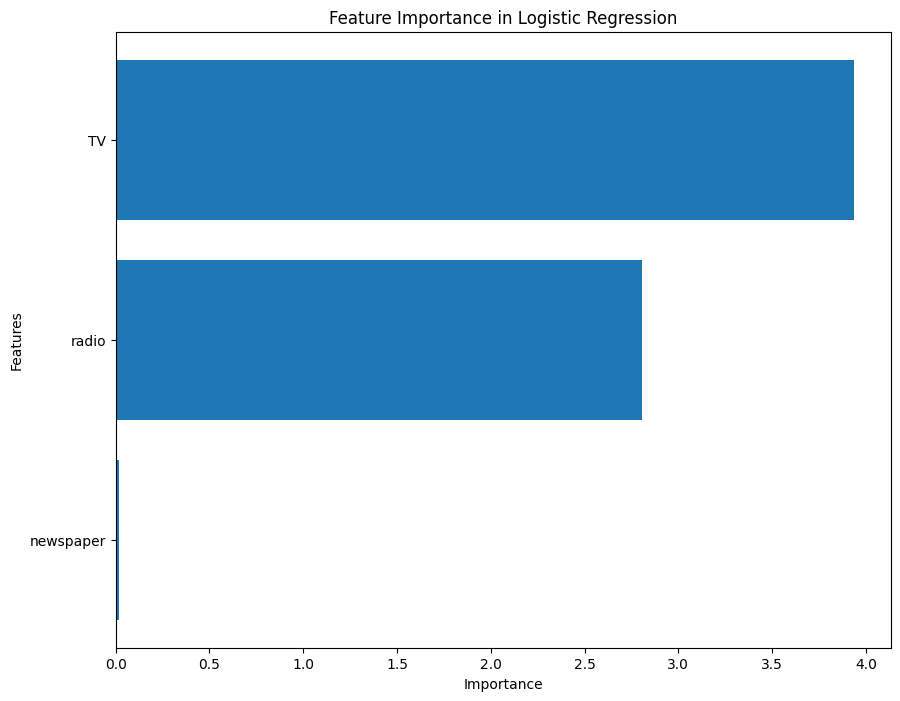

In [34]:
feature_names = column_names
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

In [35]:
X = df.drop('sales', axis=1)
y = df[["sales"]]

In [36]:

from sklearn.inspection import permutation_importance
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size=0.20, random_state=99)
model = LinearRegression().fit(X_train, y_train)
model.score(X_val, y_val)
r = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    print(f"{feature_names[i]:<8}"
          f"{r.importances_mean[i]:.3f}"
          f" +/- {r.importances_std[i]:.3f}")

TV      1.104 +/- 0.147
radio   0.529 +/- 0.098
newspaper-0.000 +/- 0.000


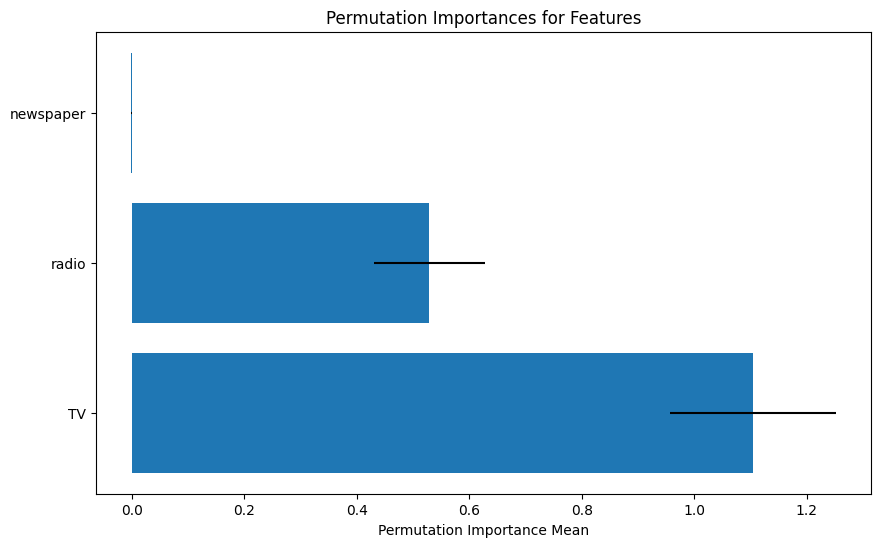

In [37]:
sorted_indices = r.importances_mean.argsort()[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importances_mean = r.importances_mean[sorted_indices]
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances_mean, xerr=r.importances_std[sorted_indices])
plt.xlabel('Permutation Importance Mean')
plt.title('Permutation Importances for Features')
plt.show()

**TV Feature:**
<div class="alert alert-warning">
    
### English 
Permutation Importance: 1.104 +/- 0.147 \
Interpretation: The 'TV' feature has a relatively high positive permutation importance of 1.104. This means that when you randomly shuffle the values of 'TV' in your dataset, the model's predictive performance\ decreases significantly, indicating that 'TV' is an important predictor of sales. The standard deviation of 0.147 suggests that this importance value is relatively stable across different permutations.\
### German 
Permutationswichtigkeit: 1.104 +/- 0.147
Interpretation: Das Merkmal 'TV' hat eine relativ hohe positive Permutationswichtigkeit von 1.104. Das bedeutet, dass wenn Sie die Werte von 'TV' in Ihrem Datensatz zufällig mischen, die Vorhersageleistung des Modells signifikant sinkt, was darauf hinweist, dass 'TV' ein wichtiger Prädiktor für Verkäufe ist. Die Standardabweichung von 0.147 deutet darauf hin, dass dieser Wichtigkeitswert über verschiedene Permutationen hinweg relativ stabil ist.


**Radio Feature:**
<div class="alert alert-warning">
    
### English 
Permutation Importance: 0.529 +/- 0.098
Interpretation: The 'radio' feature has a positive permutation importance of 0.529, though it is lower than 'TV.' This indicates that 'radio' also plays a role in predicting sales, but it is not as important as 'TV.' The standard deviation of 0.098 suggests that this importance value is relatively stable.
### German

Permutationswichtigkeit: 0.529 +/- 0.098
Interpretation: Das Merkmal 'Radio' hat eine positive Permutationswichtigkeit von 0.529, obwohl sie niedriger als bei 'TV' ist. Dies deutet darauf hin, dass 'Radio' ebenfalls eine Rolle bei der Vorhersage von Verkäufen spielt, aber nicht so wichtig wie 'TV' ist. Die Standardabweichung von 0.098 deutet darauf hin, dass dieser Wichtigkeitswert relativ stabil ist

**Newspaper Feature**
<div class="alert alert-warning">
    
### English 
Permutation Importance: -0.000 +/- 0.000
Interpretation: The 'newspaper' feature has a permutation importance of approximately zero, with a standard deviation of zero. This means that shuffling the values of 'newspaper' does not significantly affect the model's predictive performance. In other words, the 'newspaper' feature does not appear to contribute meaningfully to predicting sales in your model.

### German 
Permutationswichtigkeit: -0.000 +/- 0.000
Interpretation: Das Merkmal 'Zeitung' hat eine Permutationswichtigkeit von ungefähr null, mit einer Standardabweichung von null. Das bedeutet, dass das Mischen der Werte von 'Zeitung' die Vorhersageleistung des Modells nicht signifikant beeinflusst. Mit anderen Worten, das Merkmal 'Zeitung' scheint nicht sinnvoll zur Vorhersage von Verkäufen in Ihrem Modell beizutragen.


In [38]:
scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
r_multi = permutation_importance(
    model, X_val, y_val, n_repeats=30, random_state=0, scoring=scoring)
for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
for i in r.importances_mean.argsort()[::-1]:
    print(f"{feature_names[i]:<8}"
          f"{r.importances_mean[i]:.3f}"
          f" +/- {r.importances_std[i]:.3f}")

r2
neg_mean_absolute_percentage_error
neg_mean_squared_error
TV      28.307 +/- 3.777
radio   13.569 +/- 2.525
newspaper-0.005 +/- 0.006


### English 
- We can also use different metric for permutation_importance
### German 
- Wir können auch verschiedene Metriken für die Permutationswichtigkeit verwenden.

## Save  the model

In [40]:
from sklearn.pipeline import Pipeline
import joblib

In [41]:

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
])
pipeline.fit(X_train, y_train)
joblib.dump(pipeline, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [42]:

data = {
    'TV': [135, 127, 191, 66, 119],
    'radio': [48.3, 80.2, 75.5, 31.5, 19.4],
    'newspaper': [47.0, 0.0, 10.8, 24.6, 16.0],
}
df = pd.DataFrame(data)

In [43]:
loaded_pipeline = joblib.load('linear_regression_model.pkl')
predictions = loaded_pipeline.predict(df)

In [44]:
df['predicted']=predictions

In [45]:
df.head()

,TV,radio,newspaper,predicted
0,135,48.3,47.0,18.173449
1,127,80.2,0.0,23.777793
2,191,75.5,10.8,25.813721
3,66,31.5,24.6,11.854847
4,119,19.4,16.0,11.982894
